In [68]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [69]:
# Langkah 1: Memuat dataset dan menampilkan kolom
file_path = 'datasetmahasiswa_mix.xlsx'
data = pd.read_excel(file_path)

In [70]:
print(data.columns)

Index(['IPS 1', 'IPS 2', 'IPS 3', 'IPS 4', 'Tagihan 1', 'Tagihan 2',
       'Tagihan 3', 'Tagihan 4', 'Kehadiran', 'Target'],
      dtype='object')


In [71]:
print(data.head(10))

   IPS 1  IPS 2  IPS 3  IPS 4  Tagihan 1  Tagihan 2  Tagihan 3  Tagihan 4  \
0   2.38   2.70   3.02   3.00          0          0          0          0   
1   2.69   2.50   3.07   2.83          0          1          1          1   
2   2.45   1.43   2.16   0.27          0          0          0          0   
3   3.24   3.83   3.65   3.61          0          1          1          1   
4   2.24   3.14   1.90   1.89          0          0          0          0   
5   2.74   2.41   2.75   2.86          0          0          0          0   
6   2.31   2.77   2.64   2.82          0          0          0          0   
7   2.67   2.89   2.66   2.45          0          0          0          0   
8   3.43   3.56   3.55   3.67          0          1          1          1   
9   3.76   3.81   3.17   3.63          0          0          0          1   

   Kehadiran  Target  
0      27.42       2  
1      34.18       2  
2      10.70       2  
3      98.32       1  
4      90.51       1  
5      11.71  

In [72]:
# Check the class distribution
print("Class distribution before balancing:")
print(data['Target'].value_counts())

Class distribution before balancing:
Target
1    208
2    110
Name: count, dtype: int64


In [73]:
# Print column names to verify
print(data.columns)

# Sesuaikan nama kolom dengan yang benar
X = data.drop(columns=['Target'])  # Sesuaikan 'Target'
y = data['Target']  # Sesuaikan 'Target'

# Terapkan RandomOverSampler
ros = RandomOverSampler(sampling_strategy='auto')
X_resampled, y_resampled = ros.fit_resample(X, y)


Index(['IPS 1', 'IPS 2', 'IPS 3', 'IPS 4', 'Tagihan 1', 'Tagihan 2',
       'Tagihan 3', 'Tagihan 4', 'Kehadiran', 'Target'],
      dtype='object')


In [74]:
# Menggabungkan kembali fitur dan label
data_resampled = pd.concat([X_resampled, y_resampled], axis=1)

In [75]:
# Langkah 2: Memeriksa distribusi data
count_lulus = data[data['Target'] == 1].shape[0]
count_do = data[data['Target'] == 2].shape[0]
print(f'Jumlah mahasiswa yang lulus (lulus=1): {count_lulus}')
print(f'Jumlah mahasiswa yang drop out (do=2): {count_do}')


Jumlah mahasiswa yang lulus (lulus=1): 208
Jumlah mahasiswa yang drop out (do=2): 110


In [76]:
# Memeriksa distribusi data setelah resampling
count_lulus_resampled = data_resampled[data_resampled['Target'] == 1].shape[0]  # Sesuaikan 'LULUS'
count_do_resampled = data_resampled[data_resampled['Target'] == 2].shape[0]  # Sesuaikan 'DO'

print(f'Jumlah mahasiswa yang lulus setelah resampling (lulus=1): {count_lulus_resampled}')
print(f'Jumlah mahasiswa yang drop out setelah resampling (do=2): {count_do_resampled}')

Jumlah mahasiswa yang lulus setelah resampling (lulus=1): 208
Jumlah mahasiswa yang drop out setelah resampling (do=2): 208


In [77]:
# Bagi dataset menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model untuk data tidak seimbang
model_unbalanced = SVC()
model_unbalanced.fit(X_train, y_train)

# Oversampling dengan SMOTE pada data training
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Model untuk data seimbang
model_balanced = SVC()
model_balanced.fit(X_res, y_res)

# Evaluasi Model
from sklearn.metrics import classification_report, confusion_matrix

# Model evaluasi pada data yang tidak seimbang
y_pred_unbalanced = model_unbalanced.predict(X_test)
print("Laporan Klasifikasi Data Tidak Seimbang:\n", classification_report(y_test, y_pred_unbalanced))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_unbalanced))

# Model evaluasi pada data yang seimbang
y_pred_balanced = model_balanced.predict(X_test)
print("Laporan Klasifikasi Data Seimbang:\n", classification_report(y_test, y_pred_balanced))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_balanced))


Laporan Klasifikasi Data Tidak Seimbang:
               precision    recall  f1-score   support

           1       1.00      0.98      0.99        43
           2       0.95      1.00      0.98        21

    accuracy                           0.98        64
   macro avg       0.98      0.99      0.98        64
weighted avg       0.99      0.98      0.98        64

Confusion Matrix:
 [[42  1]
 [ 0 21]]
Laporan Klasifikasi Data Seimbang:
               precision    recall  f1-score   support

           1       1.00      0.98      0.99        43
           2       0.95      1.00      0.98        21

    accuracy                           0.98        64
   macro avg       0.98      0.99      0.98        64
weighted avg       0.99      0.98      0.98        64

Confusion Matrix:
 [[42  1]
 [ 0 21]]


In [78]:
# Langkah 4: Memeriksa hasil akhir
print(data_resampled.head())
print(data_resampled['Target'].value_counts())  # Sesuaikan 'LULUS'
print(data_resampled['Target'].value_counts())  # Sesuaikan 'DO'

   IPS 1  IPS 2  IPS 3  IPS 4  Tagihan 1  Tagihan 2  Tagihan 3  Tagihan 4  \
0   2.38   2.70   3.02   3.00          0          0          0          0   
1   2.69   2.50   3.07   2.83          0          1          1          1   
2   2.45   1.43   2.16   0.27          0          0          0          0   
3   3.24   3.83   3.65   3.61          0          1          1          1   
4   2.24   3.14   1.90   1.89          0          0          0          0   

   Kehadiran  Target  
0      27.42       2  
1      34.18       2  
2      10.70       2  
3      98.32       1  
4      90.51       1  
Target
2    208
1    208
Name: count, dtype: int64
Target
2    208
1    208
Name: count, dtype: int64


In [79]:
# Separate features and target variable
X = data.drop('Target', axis=1)
y = data['Target']

In [80]:
# Perform oversampling
ros = RandomOverSampler(random_state=42)
X_resampled_over, y_resampled_over = ros.fit_resample(X, y)

In [81]:
# Split data into training and testing sets (for oversampled data)
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_resampled_over, y_resampled_over, test_size=0.3, random_state=42)
print(f'Ukuran data training (oversampling): {X_train_over.shape}')
print(f'Ukuran data testing (oversampling): {X_test_over.shape}')

Ukuran data training (oversampling): (291, 9)
Ukuran data testing (oversampling): (125, 9)


In [82]:
# Train SVM model on oversampled data
svm_model_over = SVC(kernel='linear')
svm_model_over.fit(X_train_over, y_train_over)

SVC(kernel='linear')

In [83]:
# Predict on oversampled testing data
y_pred_over = svm_model_over.predict(X_test_over)

In [84]:
# Calculate metrics for oversampled data
accuracy_over = accuracy_score(y_test_over, y_pred_over)
precision_over = precision_score(y_test_over, y_pred_over, average='weighted')
recall_over = recall_score(y_test_over, y_pred_over, average='weighted')
f1_over = f1_score(y_test_over, y_pred_over, average='weighted')
conf_matrix_over = confusion_matrix(y_test_over, y_pred_over)

print(f'Akurasi model (oversampling): {accuracy_over}')
print(f'Presisi model (oversampling): {precision_over}')
print(f'Recall model (oversampling): {recall_over}')
print(f'F1-Score model (oversampling): {f1_over}')
print(f'Confusion Matrix (oversampling):\n{conf_matrix_over}')

Akurasi model (oversampling): 0.976
Presisi model (oversampling): 0.9761630546955624
Recall model (oversampling): 0.976
F1-Score model (oversampling): 0.9760186034493895
Confusion Matrix (oversampling):
[[55  1]
 [ 2 67]]


In [85]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [86]:
# Reduksi dimensi dengan PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [87]:
# Hyperparameter tuning dengan GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
             scoring='accuracy')

In [88]:
# Model terbaik
best_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'C': 1, 'kernel': 'linear'}


In [89]:
# Train the best SVM model on reduced data
best_model.fit(X_train_pca, y_train)

SVC(C=1, kernel='linear')

In [90]:
# Predict on the test set
y_pred_pca = best_model.predict(X_test_pca)

In [91]:
# Plotting the data and hyperplane
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

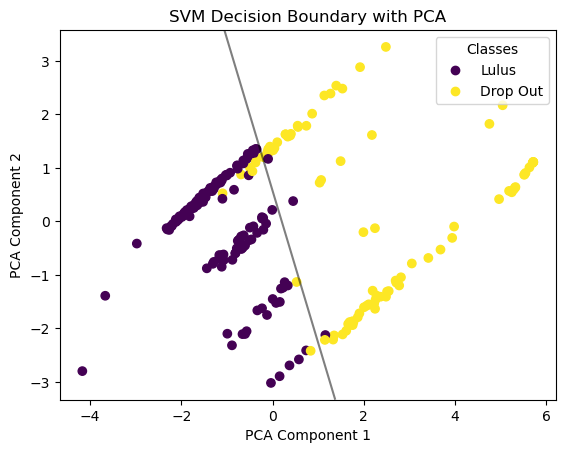

In [92]:
# Plot data points
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')

# Update legend labels
handles, _ = scatter.legend_elements()
labels = ['Lulus' if label == 1 else 'Drop Out' for label in np.unique(y_train)]
plt.legend(handles, labels, title="Classes")

# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 30), np.linspace(ylim[0], ylim[1], 30))
Z = best_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])
# Add axis labels
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('SVM Decision Boundary with PCA')
plt.show()

In [93]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_pca)
precision = precision_score(y_test, y_pred_pca, average='weighted')
recall = recall_score(y_test, y_pred_pca, average='weighted')
f1 = f1_score(y_test, y_pred_pca, average='weighted')
classification_rep = classification_report(y_test, y_pred_pca)

print("Model SVM Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:")
print(classification_rep)

Model SVM Accuracy: 0.984375
Precision: 0.9847301136363636
Recall: 0.984375
F1 Score: 0.984274250070087
Classification Report:
              precision    recall  f1-score   support

           1       0.98      1.00      0.99        43
           2       1.00      0.95      0.98        21

    accuracy                           0.98        64
   macro avg       0.99      0.98      0.98        64
weighted avg       0.98      0.98      0.98        64



In [94]:
# Confusion matrix and calculation of TP, TN, FP, FN
cm = confusion_matrix(y_test, y_pred_pca)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[43  0]
 [ 1 20]]


True Positives (TP): 20
True Negatives (TN): 43
False Positives (FP): 0
False Negatives (FN): 1
Confusion Matrix Accuracy: 0.984375


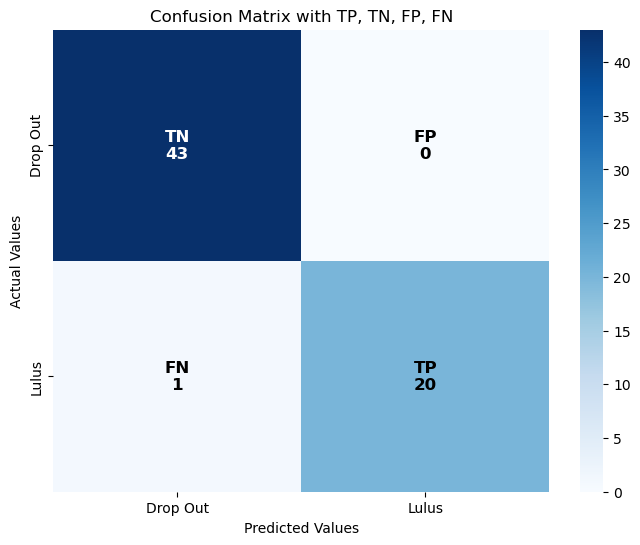

In [95]:
# Assuming binary classification with classes 0 and 1
TN, FP, FN, TP = cm.ravel()

print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)

# Calculate accuracy from confusion matrix
conf_matrix_accuracy = (TP + TN) / (TP + TN + FP + FN)
print("Confusion Matrix Accuracy:", conf_matrix_accuracy)

# Plotting the confusion matrix with modified labels
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
                 xticklabels=['Drop Out', 'Lulus'], yticklabels=['Drop Out', 'Lulus'])

# Remove duplicated annotations by turning off the annot
for t in ax.texts: 
    t.set_visible(False)

# Adding TP, TN, FP, FN text annotations
plt.text(0.5, 0.5, f'TN\n{TN}', ha='center', va='center', color='white', fontsize=12, weight='bold')
plt.text(1.5, 0.5, f'FP\n{FP}', ha='center', va='center', color='black', fontsize=12, weight='bold')
plt.text(0.5, 1.5, f'FN\n{FN}', ha='center', va='center', color='black', fontsize=12, weight='bold')
plt.text(1.5, 1.5, f'TP\n{TP}', ha='center', va='center', color='black', fontsize=12, weight='bold')

# Labels and title
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix with TP, TN, FP, FN')

# Save and display the updated confusion matrix
plt.show()

In [60]:
def prediksi_data_baru(data_baru):
    # Konversi data baru menjadi DataFrame
    data_baru_df = pd.DataFrame(data_baru)

    # Standarisasi data baru
    data_baru_scaled = scaler.transform(data_baru_df)

    # Reduksi dimensi dengan PCA
    data_baru_pca = pca.transform(data_baru_scaled)

    # Prediksi
    prediksi_baru = best_model.predict(data_baru_pca)

    return prediksi_baru

# Contoh data baru untuk diprediksi
data_baru = {
    'IPS 1': [1.45, 2.00],
    'IPS 2': [1.50, 2.75],
    'IPS 3': [2.45, 3.00],
    'IPS 4': [2.50, 3.45],
    'Tagihan 1': [0, 0],
    'Tagihan 2': [0, 1],
    'Tagihan 3': [0, 0],
    'Tagihan 4': [0, 0],
    'Kehadiran': [80, 50]
}

# Prediksi untuk data baru
prediksi = prediksi_data_baru(data_baru)
print('Prediksi kelulusan untuk data baru:', prediksi)


Prediksi kelulusan untuk data baru: [2 1]
